In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random
from sklearn.utils import shuffle
from sklearn import cluster
import CreateDataFunctions as df
from scipy.spatial import distance
data1, c1  = df.Data_gussian_cluster()
data2, c2 = df.Data_circ_cluster()
data3, c3 = df.Data_separated_clusters()

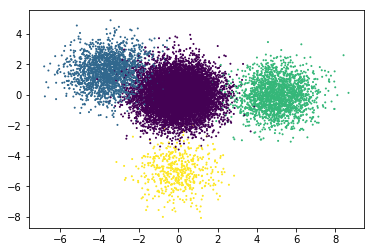

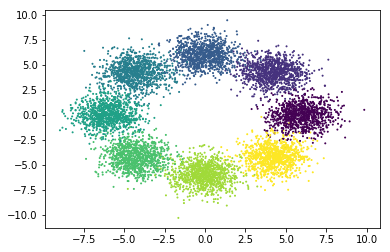

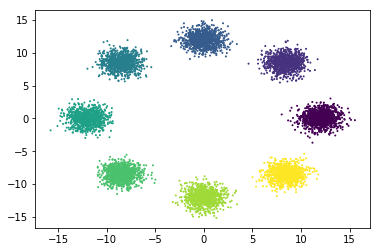

In [2]:
plt.scatter(data1[:,0],data1[:,1],s=1,c=c1)
plt.show()
plt.scatter(data2[:,0],data2[:,1],s=1,c=c2)
plt.show()
plt.scatter(data3[:,0],data3[:,1],s=1,c=c3)
plt.show()

In [3]:
def ComputeBIC(kmeans, data):
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    m = kmeans.n_clusters
    n = np.bincount(labels)
    N, d = data.shape
    
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(data[np.where(labels == i)],
    [centers[0][i]], 'euclidean')**2) for i in range(m)])
    print(cl_var)
    const_term = 0.5 * m * np.log(N) * (d+1)
    
    BIC = (np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term)*(-1)
    
    return(BIC)
    
    


In [19]:
ks = range(1,20)
KMeans = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data1) for k in ks]
KMeans = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data2) for k in ks]
KMeans = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data3) for k in ks]
BIC1 = [ComputeBIC(kmeansi,data1) for kmeansi in KMeans]
BIC2 = [ComputeBIC(kmeansi,data2) for kmeansi in KMeans]
BIC3 = [ComputeBIC(kmeansi,data3) for kmeansi in KMeans]


[2.27572261]
[6.55075167]
[9.19138634]
[10.69684498]
[11.13037127]
[11.44855873]
[11.76343306]
[12.11717017]
[12.14285049]
[12.16497458]
[12.18338969]
[12.22561054]
[12.23558041]
[12.26442712]
[12.27935652]
[12.29368751]
[12.30934376]
[12.3154841]
[12.34177568]
[5.39199882]
[8.8030683]
[11.09377548]
[12.2982848]
[12.64135071]
[12.92800779]
[13.18276273]
[13.42405842]
[13.44744584]
[13.46440238]
[13.4899391]
[13.502658]
[13.52212986]
[13.5396241]
[13.55375114]
[13.57232713]
[13.58402643]
[13.61185162]
[13.612269]
[19.02954032]
[11.29649209]
[6.27939123]
[3.61035408]
[2.75712717]
[2.079288]
[1.51570344]
[0.96637708]
[0.91934897]
[0.87519016]
[0.83294947]
[0.79161166]
[0.7504192]
[0.71307522]
[0.67183576]
[0.6411818]
[0.6136948]
[0.58023461]
[0.5503851]


[34052.42732452742, 47993.025482427336, 53990.41276672423, 57564.05488447117, 59571.22884809187, 61267.77273194733, 62693.6144810065, 64159.0339114513, 64914.13210472366]


Text(0, 0.5, 'value for BIC')

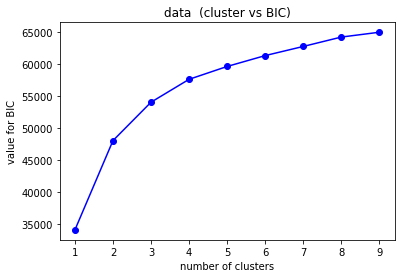

In [16]:
print(BIC1)
plt.plot(ks,BIC1,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")





[42815.74390181959, 52286.67270176083, 57358.41867310359, 60543.55843941009, 62458.46708797522, 64095.6233145233, 65469.691939811055, 66843.93342838233, 67592.13328255933]


Text(0, 0.5, 'value for BIC')

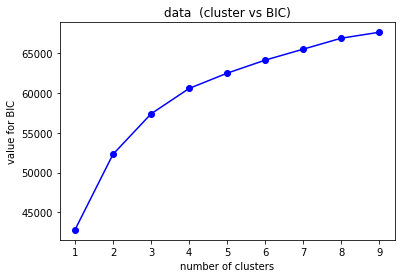

In [13]:
print(BIC2)
plt.plot(ks,BIC2,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")




[46283.43753081847, 47669.073263176455, 46182.12979323365, 44113.68589863063, 43665.992448376805, 42839.41640861123, 41536.67414507009, 39164.548025660646, 39506.60079565503, 39845.69286516375, 40181.18218725441, 40453.986479280866, 40731.41814719302, 40993.10088146188, 41224.841845931835, 41520.10234747139, 41595.26353878953, 41585.64023008789, 41558.633106057954]


Text(0, 0.5, 'value for BIC')

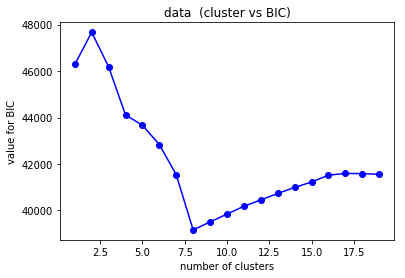

In [21]:
print(BIC3)
plt.plot(ks,BIC3,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")